In [67]:
# importing libraries
import numpy as np
import pandas as pd
import datetime as dt


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
file_location = 'C://Projects_python//Project_machinelearning//CaseStudy//Input//14. Capstone Case Study - Finding-Marketing-Insights//Datasets//'

In [3]:
# Importing files
file_name = 'CustomersData.xlsx'
customer_data = pd.read_excel(file_location+file_name)

file_name = 'Discount_Coupon.csv'
discount_coup = pd.read_csv(file_location+file_name)

file_name = 'Marketing_Spend.csv'
marketing_spend = pd.read_csv(file_location+file_name)

file_name = 'Online_Sales.csv'
online_sale = pd.read_csv(file_location+file_name)

file_name = 'Tax_amount.xlsx'
tax_amount = pd.read_excel(file_location+file_name)

1. **Calculate Invoice amount or sale_amount or revenue for each transaction and item level**
   - Invoice Value = ((Quantity * Avg_price) * (1 - Discount_pct) * (1 + GST)) + Delivery_Charges

2. **Perform Detailed exploratory analysis**
   - Understanding how many customers acquired every month
   - Understand the retention of customers on a month-on-month basis
   - How the revenues from existing/new customers on a month-on-month basis
   - How the discounts play a role in the revenues
   - Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day, etc.
   - Understand the trends/seasonality of sales by category, location, month, etc.
   - How the number of orders varies and sales with different days
   - Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month
   - How marketing spend is impacting on revenue
   - Which product appeared in the transactions
   - Which product was purchased mostly based on the quantity

3. **Performing Customer Segmentation**
   - Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define a strategy on the same
   - Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

4. **Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)**
   - First, define a dependent variable with categories low value, medium value, high value using customer revenue
   - Then perform a Classification model

5. **Cross-Selling (Which products are selling together)**
   - You can perform exploratory analysis & market basket analysis to understand which items can be bundled together

6. **Predicting Next Purchase Day (How soon each customer can visit the store, 0-30 days, 30-60 days, 60-90 days, 90+ days)**
   - For this, we need to create a dependent variable at the customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days, and 90+ days) then build a classification model to predict the next purchase of a given customer

7. **Perform cohort analysis by defining below cohorts**
   - Customers who started in each month and understand their behavior
   - Which Month cohort has maximum retention?


## 1. **Calculate Invoice amount or sale_amount or revenue for each transaction and item level**
   - Invoice Value = ((Quantity * Avg_price) * (1 - Discount_pct) * (1 + GST)) + Delivery_Charges

In [4]:
# Merging CustomerData with Online_Sales
df = pd.merge(online_sale, customer_data, on='CustomerID', how='inner')

In [5]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months'],
      dtype='object')

In [6]:
discount_coup.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [7]:
# Merging Discount_Coupon with merged_data
df = pd.merge(left=df, right= discount_coup, left_on='Product_Category', right_on= 'Product_Category ', how='left')

In [8]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Product_Category ', 'Coupon_Code',
       'Discount_pct'],
      dtype='object')

In [9]:
marketing_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [10]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Product_Category,Coupon_Code,Discount_pct
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,Nest-USA,ELEC10,10.0
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Feb,Nest-USA,ELEC20,20.0
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Mar,Nest-USA,ELEC30,30.0
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Apr,Nest-USA,ELEC10,10.0
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,May,Nest-USA,ELEC20,20.0


In [11]:
# converting the transaction date column in df to a proper date format

In [12]:
# making the year, date and month columns from transaction date column
df['year'] = df.Transaction_Date.astype('str').str[0:4]
df['month'] = df.Transaction_Date.astype('str').str[4:6]
df['date'] = df.Transaction_Date.astype('str').str[6:]

In [13]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Product_Category,Coupon_Code,Discount_pct,year,month,date
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,Nest-USA,ELEC10,10.0,2019,01,01
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Feb,Nest-USA,ELEC20,20.0,2019,01,01
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Mar,Nest-USA,ELEC30,30.0,2019,01,01
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Apr,Nest-USA,ELEC10,10.0,2019,01,01
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,May,Nest-USA,ELEC20,20.0,2019,01,01


In [14]:
df.Transaction_Date = df.year +'/' + df.month +'/'+ df.date

In [15]:
# Merging marketing_spend with merged_data
df = pd.merge(df, marketing_spend, left_on='Transaction_Date', right_on='Date', how='left')

In [16]:
# Convert 'Transaction_Date' to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

In [17]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Month,Product_Category,Coupon_Code,Discount_pct,year,month,date,Date,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Jan,Nest-USA,ELEC10,10.0,2019,01,01,NaN,NaN,NaN
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Feb,Nest-USA,ELEC20,20.0,2019,01,01,NaN,NaN,NaN
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Mar,Nest-USA,ELEC30,30.0,2019,01,01,NaN,NaN,NaN
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Apr,Nest-USA,ELEC10,10.0,2019,01,01,NaN,NaN,NaN
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,May,Nest-USA,ELEC20,20.0,2019,01,01,NaN,NaN,NaN


In [18]:
tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [19]:
# Merging marketing_spend with merged_data
df = pd.merge(df, tax_amount, on='Product_Category', how='left')

In [20]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Product_Category ', 'Coupon_Code',
       'Discount_pct', 'year', 'month', 'date', 'Date', 'Offline_Spend',
       'Online_Spend', 'GST'],
      dtype='object')

In [21]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Product_Category,Coupon_Code,Discount_pct,year,month,date,Date,Offline_Spend,Online_Spend,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Nest-USA,ELEC10,10.0,2019,01,01,NaN,NaN,NaN,0.1
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Nest-USA,ELEC20,20.0,2019,01,01,NaN,NaN,NaN,0.1
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Nest-USA,ELEC30,30.0,2019,01,01,NaN,NaN,NaN,0.1
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Nest-USA,ELEC10,10.0,2019,01,01,NaN,NaN,NaN,0.1
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Nest-USA,ELEC20,20.0,2019,01,01,NaN,NaN,NaN,0.1


In [22]:
df['Coupon_Code'].fillna('Not Available',inplace=True)
df['Discount_pct'].fillna(0, inplace=True)

In [23]:
df['Invoice'] = np.where(
    df['Coupon_Status'] == 'Used',
    ((df['Quantity'] * df['Avg_Price']) * (1 - df['Discount_pct']/100) * (1 + df['GST'])) + df['Delivery_Charges'],
    ((df['Quantity'] * df['Avg_Price']) * (1 + df['GST'])) + df['Delivery_Charges']
)

## 2. **Perform Detailed exploratory analysis**
   - Understanding how many customers acquired every month
   - Understand the retention of customers on a month-on-month basis
   - How the revenues from existing/new customers on a month-on-month basis
   - How the discounts play a role in the revenues
   - Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day, etc.
   - Understand the trends/seasonality of sales by category, location, month, etc.
   - How the number of orders varies and sales with different days
   - Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month
   - How marketing spend is impacting on revenue
   - Which product appeared in the transactions
   - Which product was purchased mostly based on the quantity

In [24]:
# Understanding how many customers acquired every month
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Coupon_Code,Discount_pct,year,month,date,Date,Offline_Spend,Online_Spend,GST,Invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,10.0,2019,01,01,NaN,NaN,NaN,0.1,158.6729
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC20,20.0,2019,01,01,NaN,NaN,NaN,0.1,141.7648
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC30,30.0,2019,01,01,NaN,NaN,NaN,0.1,124.8567
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,10.0,2019,01,01,NaN,NaN,NaN,0.1,158.6729
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC20,20.0,2019,01,01,NaN,NaN,NaN,0.1,141.7648


In [25]:
df.Transaction_Date.head()

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: Transaction_Date, dtype: datetime64[ns]

In [26]:
plt.style.use('ggplot')

In [27]:
df['Month_name'] = df['Transaction_Date'].apply(lambda x: dt.datetime.strftime(x, '%b'))

In [28]:
df.Month_name

0         Jan
1         Jan
2         Jan
3         Jan
4         Jan
         ... 
630683    Dec
630684    Dec
630685    Dec
630686    Dec
630687    Dec
Name: Month_name, Length: 630688, dtype: object

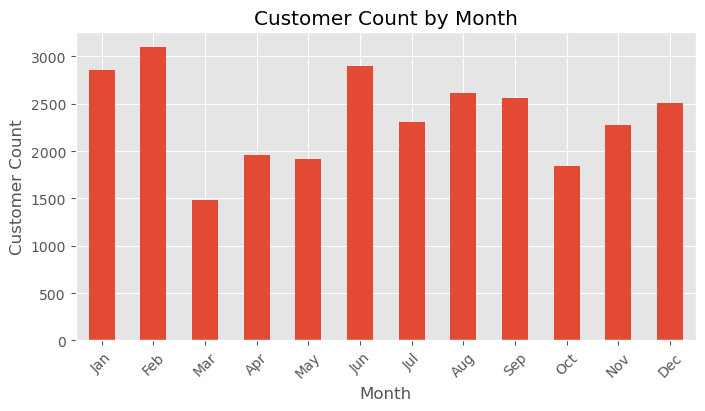

In [29]:
total_customers_by_month = df.groupby('Month_name')['Invoice'].sum()
customer_count_by_month = df.groupby('Month_name')['Invoice'].nunique()
plt.figure(figsize=(8, 4))
customer_count_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [30]:
# Understand the retention of customers on a month-on-month basis
month_dict = {}
for month in df['Month_name'].unique():
    month_dict[month] = df[df['Month_name'] == month]['CustomerID'].unique().tolist()

In [31]:
month_dict

{'Jan': [17850,
  13047,
  12583,
  13748,
  15100,
  15291,
  14688,
  17809,
  15311,
  14527,
  16098,
  18074,
  17420,
  16029,
  16250,
  12431,
  17511,
  17548,
  13705,
  13747,
  13408,
  13767,
  17924,
  13448,
  15862,
  15513,
  12791,
  16218,
  14045,
  14307,
  17908,
  17920,
  12838,
  13255,
  16583,
  18085,
  13758,
  13694,
  15983,
  14849,
  17968,
  16210,
  17897,
  17377,
  16552,
  17181,
  17951,
  14729,
  12748,
  15012,
  12868,
  17572,
  14078,
  14001,
  12662,
  15525,
  14237,
  17905,
  15485,
  12433,
  16955,
  15350,
  15605,
  18144,
  15922,
  14594,
  15165,
  14911,
  16456,
  17841,
  12472,
  17346,
  17643,
  17873,
  13093,
  12921,
  13468,
  17760,
  16928,
  16048,
  16274,
  14496,
  14696,
  16539,
  17025,
  13777,
  17690,
  12947,
  17460,
  18229,
  14142,
  17069,
  13065,
  14606,
  16835,
  15235,
  13576,
  18011,
  13090,
  15694,
  14741,
  13715,
  14092,
  17732,
  12855,
  15752,
  17855,
  14047,
  17925,
  13941,
  1

In [32]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [33]:
retention = [0]
for i in range(len(months) - 1):  # Iterate until the second last month
    set1 = set(month_dict[months[i]])
    set2 = set(month_dict[months[i + 1]])
    common_items = len(set1.intersection(set2))
    retention.append(common_items)

In [34]:
retention

[0, 13, 11, 24, 25, 37, 58, 65, 44, 29, 31, 28]

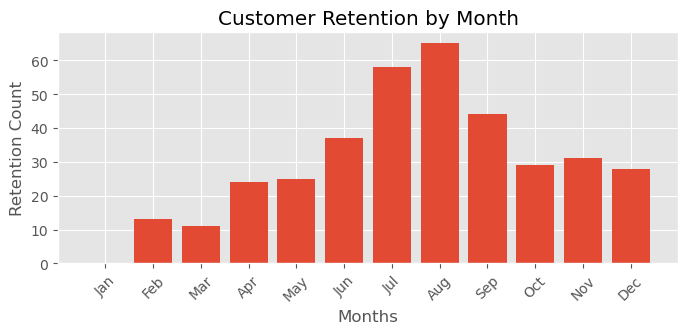

In [35]:
plt.figure(figsize=(8, 3))
plt.bar(months,retention)
plt.xlabel('Months')
plt.ylabel('Retention Count')
plt.title('Customer Retention by Month')
plt.xticks(rotation=45)
plt.show()

In [36]:
# How the revenues from existing/new customers on a month-on-month basis
temp = []
new_cust_each_month = {}
existing_cust_each_month = {}

no_of_new_cust_each_month = {}
no_of_existing_cust_each_month = {}

for i in df['Month_name'].unique():
   x = df[df['Month_name']==i]['CustomerID'].unique().tolist()
   new_cust = [value for value in x if value not in temp]
   existing_cust = [value for value in x if value in temp]
   temp.extend(x)
   temp = list(set(temp))
   new_cust_each_month[i] = new_cust
   existing_cust_each_month[i] = existing_cust
   no_of_new_cust_each_month = len(new_cust)
   no_of_existing_cust_each_month = len(existing_cust)


In [37]:
new_cust_each_month_revenue = {}
existing_cust_each_month_revenue = {}

for month, ids in new_cust_each_month.items():
    new_cust_each_month_revenue[month] = df[(df['Month'] == month) & (df['CustomerID'].isin(ids))]['Invoice'].sum()

for month, ids in existing_cust_each_month.items():
    existing_cust_each_month_revenue[month] = df[(df['Month'] == month) & (df['CustomerID'].isin(ids))]['Invoice'].sum()

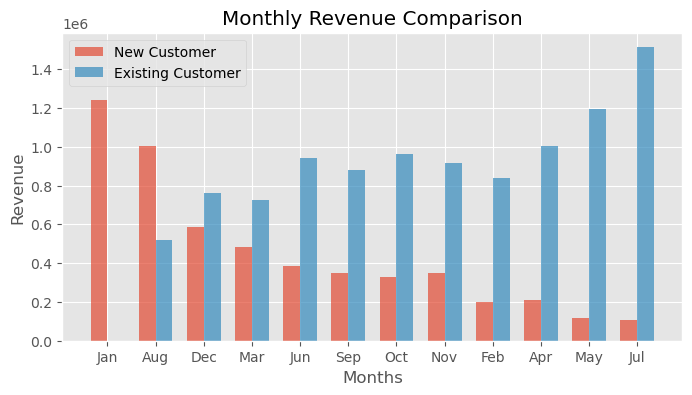

In [38]:
months = list(existing_cust_each_month_revenue.keys())
new_cust = list(new_cust_each_month_revenue.values())
existing_cust = list(existing_cust_each_month_revenue.values())

plt.figure(figsize=(8, 4))
bar_width = 0.35
bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=bar_width, label='New Customer', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], existing_cust, width=bar_width, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], months)
plt.legend()
plt.show()

In [39]:
# How the discounts play a role in the revenues

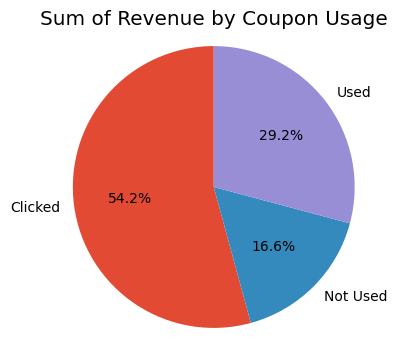

In [40]:
grouped = df.groupby('Coupon_Status')['Invoice'].sum()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Sum of Revenue by Coupon Usage')

plt.show()


In [41]:
# Which product was purchased mostly based on the quantity

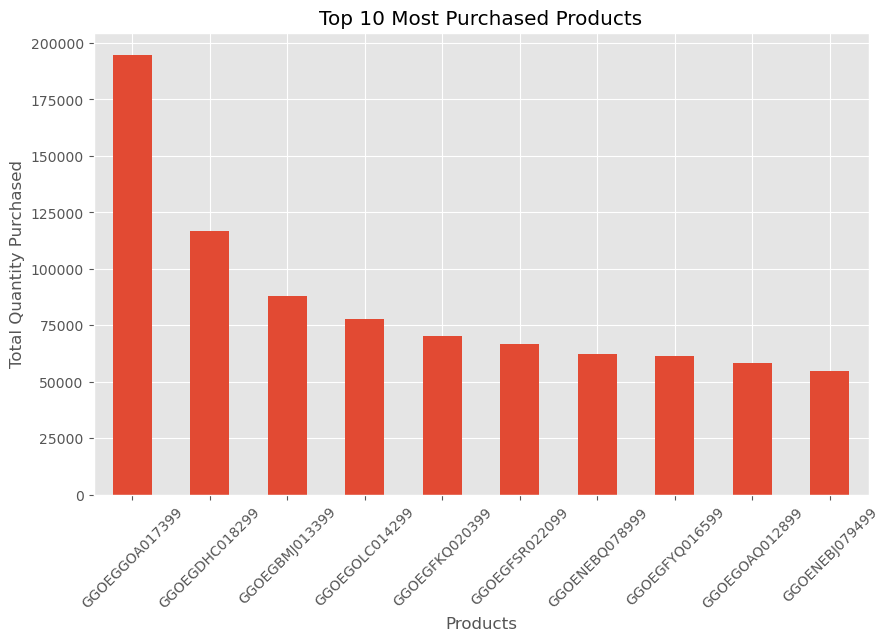

In [42]:
category_quantity = df.groupby('Product_SKU')['Quantity'].sum()

# Find the category with the highest total quantity
top_10_categories = category_quantity.sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 products
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)
plt.show()


In [43]:
top10 = top_10_categories.reset_index()
filtered_df = df[df['Product_SKU'].isin(top10['Product_SKU'])]

# Group by 'product_id' and calculate summary statistics
stats = filtered_df.groupby('Product_SKU').agg({
    'Product_Description': 'first',
    'Product_Category': 'first'  ,
     'Quantity': 'sum',
    'Invoice': 'sum'
}).reset_index()
stats.columns = ['Product ID', 'Product Description', 'Product Category','Quantity','Revenue']

In [44]:
# Display the summary statistics DataFrame
stats

,Product ID,Product Description,Product Category,Quantity,Revenue
0,GGOEGBMJ013399,Sport Bag,Bags,87852,5.038515e+05
1,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,116736,4.451346e+05
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,70164,2.964157e+05
3,GGOEGFSR022099,Google Kick Ball,Lifestyle,66588,1.884649e+05
4,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,61176,1.391216e+05
5,GGOEGGOA017399,Maze Pen,Office,194808,2.379133e+05
6,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,58332,1.898594e+05
7,GGOEGOLC014299,Google Metallic Notebook Set,Office,77952,5.000125e+05
8,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,54840,8.780868e+06
9,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,62472,8.055150e+06


In [45]:
# "Analyze key performance indicators (KPIs) such as revenue, order count, average order value, customer count (existing and new),
# and quantity, sorted by category, month, week, and day. Simplify this as:

# Top 5 categories by revenue and quantity.
# Top 5 revenue days.
# Top 5 revenue weeks.
# Top 2 revenue months."

In [46]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Discount_pct,year,month,date,Date,Offline_Spend,Online_Spend,GST,Invoice,Month_name
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,10.0,2019,01,01,NaN,NaN,NaN,0.1,158.6729,Jan
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,20.0,2019,01,01,NaN,NaN,NaN,0.1,141.7648,Jan
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,30.0,2019,01,01,NaN,NaN,NaN,0.1,124.8567,Jan
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,10.0,2019,01,01,NaN,NaN,NaN,0.1,158.6729,Jan
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,20.0,2019,01,01,NaN,NaN,NaN,0.1,141.7648,Jan


In [47]:
top_categories_ = df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Invoice')

top_categories_Quantity = df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Quantity')

top_categories_Quantity

,Invoice,Quantity
Product_Category,,
Office,4.580343e+06,1060596
Apparel,9.942748e+06,389256
Drinkware,3.265697e+06,366012
Lifestyle,1.495555e+06,298572
Nest-USA,3.265126e+07,257160


In [48]:
# Top 5 revenue days
df['Date'] = df['Transaction_Date'].dt.date
top_days = df.groupby('Date')['Invoice'].sum().nlargest(5)
print("\nTop 5 revenue days:")
top_days


Top 5 revenue days:


Date
2019-11-27    679944.34656
2019-04-05    658579.95668
2019-04-18    636885.36820
2019-07-18    496397.73984
2019-08-02    485948.87128
Name: Invoice, dtype: float64

In [49]:
# Top 5 revenue weeks
df['Week'] = df['Transaction_Date'].dt.strftime('%Y-%U')
top_weeks = df.groupby('Week')['Invoice'].sum().nlargest(5)
print("\nTop 5 revenue weeks:")
print(top_weeks)


Top 5 revenue weeks:
Week
2019-47    2.058631e+06
2019-50    1.976373e+06
2019-49    1.878970e+06
2019-48    1.683411e+06
2019-15    1.610038e+06
Name: Invoice, dtype: float64


In [50]:
# Top 2 revenue months
top_months = df.groupby('Month_name')['Invoice'].sum().nlargest(2)
print("\nTop 2 revenue months:")
print(top_months)

# Replace ['Invoice'].sum() to ['Transaction_ID'].nunique() to find based on number of orders


Top 2 revenue months:
Month_name
Dec    6.895558e+06
Nov    6.568838e+06
Name: Invoice, dtype: float64


In [51]:
# Understand the trends/seasonality of sales by category, location, month, etc.
# How the number of orders varies and sales with different days

In [52]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,year,month,date,Date,Offline_Spend,Online_Spend,GST,Invoice,Month_name,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,158.6729,Jan,2019-00
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,141.7648,Jan,2019-00
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,124.8567,Jan,2019-00
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,158.6729,Jan,2019-00
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,141.7648,Jan,2019-00


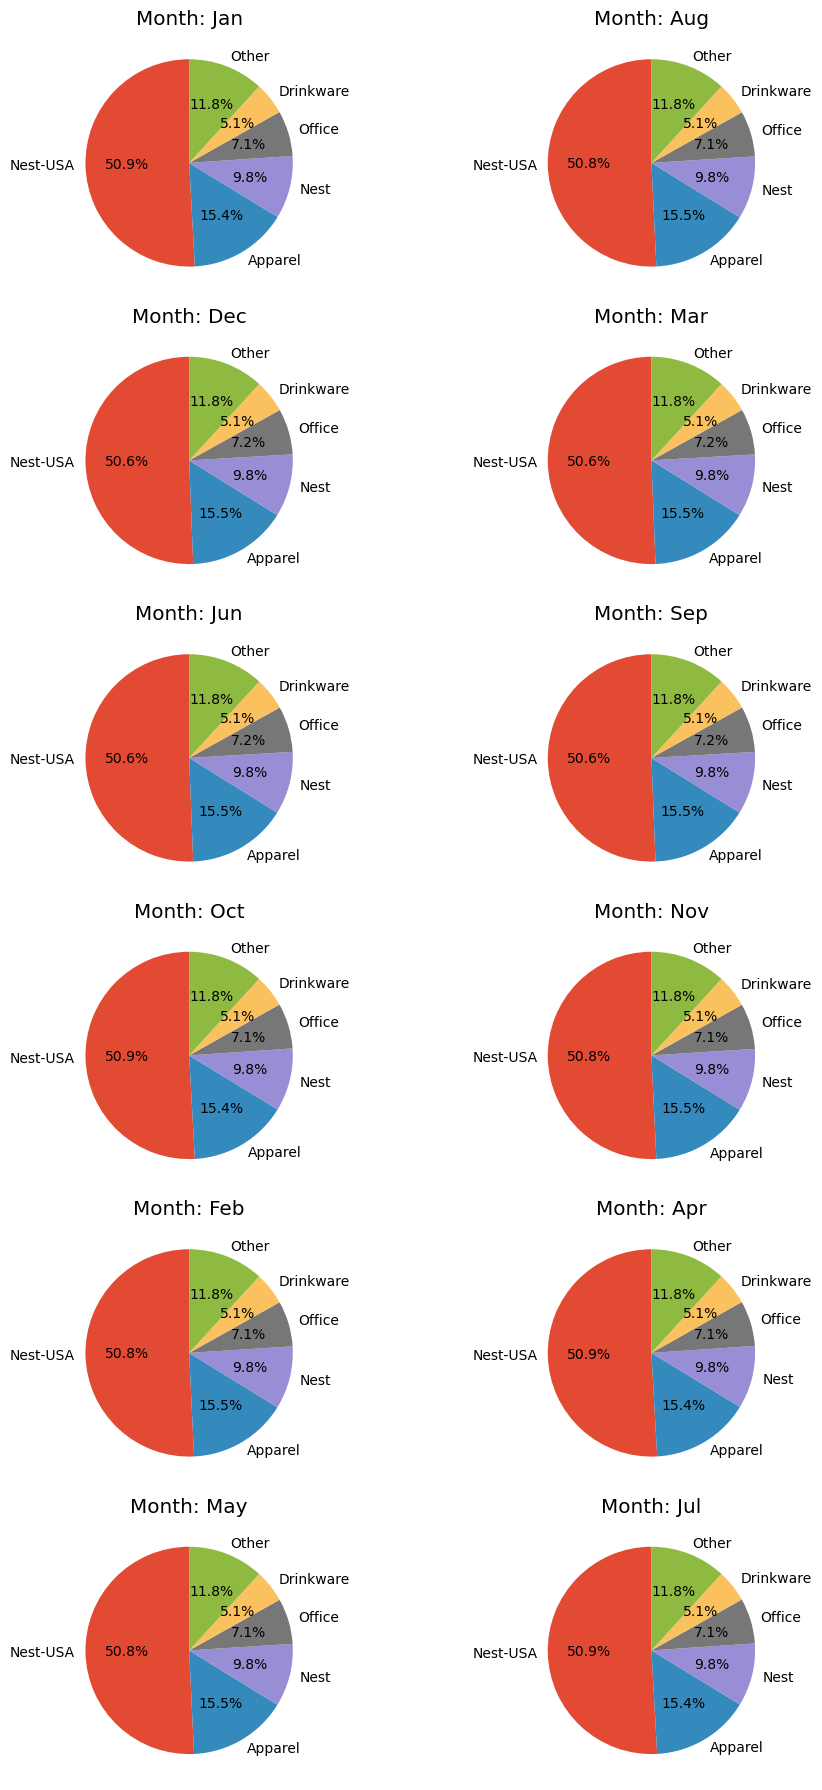

In [82]:
months = df['Month_name'].unique()
categories = df['Product_Category'].unique()

# Create a grid of pie charts
num_rows = int(len(months)/2)
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
categories_to_show = 5

for i, month in enumerate(months):
    month_data = df[df['Month'] == month]
    total_invoice = month_data.groupby('Product_Category')['Invoice'].sum()
    total_invoice = total_invoice.sort_values(ascending=False)  # Sort by total_invoicein in descending

    if len(total_invoice) > categories_to_show:
        other_sum = total_invoice.iloc[categories_to_show:].sum()
        total_invoice = total_invoice.iloc[:categories_to_show]
        total_invoice['Other'] = other_sum

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] # Access the subplot using [i, 0]

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Month: {month}')

plt.tight_layout()
plt.show()

In [54]:
mrkt_spend = df.copy()

In [84]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

mrkt_spend['Date'] = pd.to_datetime(df['Transaction_Date'], format='%m/%d/%Y')
mrkt_spend['Month'] = df['Transaction_Date'].dt.strftime('%b')
mrkt_spend['total_spend'] = df['Offline_Spend'] + df['Online_Spend']

spend = mrkt_spend.groupby('Month')['total_spend'].sum().reset_index()
invoice = df.groupby('Month')['Invoice'].sum().reset_index()
disc = df.groupby('Month')['Discount_pct'].mean().reset_index()
tax = df.groupby('Month')['GST'].mean().reset_index()
deli_charg = df.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = spend.merge(invoice, on ='Month', how='inner')
result = result.merge(disc, on='Month', how='inner')
result = result.merge(tax, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

result['market_spend_%'] = (result['total_spend']*100)/result['Invoice']
result['Delivery_Charges_%'] = (result['Delivery_Charges']*100)/result['Invoice']

result

,Month,total_spend,Invoice,Discount_pct,GST,Delivery_Charges,market_spend_%,Delivery_Charges_%
0,Apr,0.0,5.532822e+06,10.0,0.137433,550289.85,0.0,9.945916
1,Aug,0.0,5.360625e+06,20.0,0.137433,550289.85,0.0,10.265405
2,Dec,0.0,5.188427e+06,30.0,0.137433,550289.85,0.0,10.606101
3,Feb,0.0,5.360625e+06,20.0,0.137433,550289.85,0.0,10.265405
4,Jan,0.0,5.532822e+06,10.0,0.137433,550289.85,0.0,9.945916
5,Jul,0.0,5.532822e+06,10.0,0.137433,550289.85,0.0,9.945916
6,Jun,0.0,5.188427e+06,30.0,0.137433,550289.85,0.0,10.606101
7,Mar,0.0,5.188427e+06,30.0,0.137433,550289.85,0.0,10.606101
8,May,0.0,5.360625e+06,20.0,0.137433,550289.85,0.0,10.265405
9,Nov,0.0,5.360625e+06,20.0,0.137433,550289.85,0.0,10.265405


In [56]:
# How marketing spend is impacting on revenue

correlation = result['total_spend'].corr(result['Invoice'])

print(f'Correlation between market_spend_% and Invoice: {correlation}')

Correlation between market_spend_% and Invoice: nan


## 3. Performing Customer Segmentation

Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define a strategy on the same
Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

In [57]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,year,month,date,Date,Offline_Spend,Online_Spend,GST,Invoice,Month_name,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,158.6729,Jan,2019-00
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,141.7648,Jan,2019-00
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,124.8567,Jan,2019-00
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,158.6729,Jan,2019-00
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019,01,01,2019-01-01,NaN,NaN,0.1,141.7648,Jan,2019-00


In [85]:
today = pd.to_datetime('2020-01-01')  # Replace with the current date
segment = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,  # Calculate recency
    'Transaction_ID': 'count',  # Calculate frequency
    'Invoice': 'sum'  # Calculate monetary value
})

# Define thresholds for R, F, and M to segment customers
r_thresholds = [0, 100, 200, 300, float('inf')]  # Customize these as needed
f_thresholds = [0, 40, 70, 100, float('inf')]  # Customize these as needed
m_thresholds = [0, 4000, 7000,10000, float('inf')]  # Customize these as needed
# you can adjust this values by ploting sns.distplot(rfm['RFM_Segment'])

# Define segment labels
segment['R_Segment'] = pd.cut(segment['Transaction_Date'], bins=r_thresholds, labels=False) + 1
segment['F_Segment'] = pd.cut(segment['Transaction_ID'], bins=f_thresholds, labels=False) + 1
segment['M_Segment'] = pd.cut(segment['Invoice'], bins=m_thresholds, labels=False) + 1
# you can adjust thresold values by ploting sns.distplot(rfm['RFM_Segment'])

# Combine the three segments to get the final segment
segment['RFM_Segment'] = segment['R_Segment'] * 10 + segment['F_Segment'] * 10 + segment['M_Segment']*10


def h_segmentation(RFM_Segment):
    if RFM_Segment<=40:
        return 'Standard'
    elif (RFM_Segment>40) & (RFM_Segment<=70):
        return 'Silver'
    elif (RFM_Segment>70) & (RFM_Segment<=90):
        return 'Premium'
    else:
        return 'Gold'


segment['heuristic_segment'] = segment['RFM_Segment'].apply(h_segmentation)

# Merge the segment information back into the original dataset
merged_df = df.merge(segment[['heuristic_segment']], on='CustomerID', how='left')

In [86]:
segment.head()

,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment
CustomerID,,,,,,,,
12346,108,24,2142.60672,2,1,1,40,Standard
12347,60,709,190207.58888,1,4,4,90,Premium
12348,74,276,20125.21872,1,4,4,90,Premium
12350,18,204,18284.33904,1,4,4,90,Premium
12356,108,432,24986.31120,2,4,4,100,Gold


In [60]:
# Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

features = segment[['Transaction_Date', 'Transaction_ID', 'Invoice']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (K)
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
segment['kmean_segment'] = kmeans.fit_predict(scaled_features)

segment.head()

C:\Users\pauld\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment,kmean_segment
CustomerID,,,,,,,,,
12346,108,24,2142.60672,2,1,1,40,Standard,0
12347,60,709,190207.58888,1,4,4,90,Premium,2
12348,74,276,20125.21872,1,4,4,90,Premium,0
12350,18,204,18284.33904,1,4,4,90,Premium,0
12356,108,432,24986.31120,2,4,4,100,Gold,0


In [61]:
segment.groupby('kmean_segment')[['Transaction_Date', 'Transaction_ID', 'Invoice']].mean()

,Transaction_Date,Transaction_ID,Invoice
kmean_segment,,,
0,78.319737,315.592105,31162.009430
1,255.359347,245.885662,23671.076258
2,84.947368,1449.302632,154377.000905
3,30.200000,7012.200000,834650.169528


In [62]:
# Define labels based on cluster characteristics
def label_clusters(cluster):
    if cluster == 2:
        return 'Premium'
    elif cluster == 3:
        return 'Gold'
    elif cluster == 0:
        return 'Silver'
    else:
        return 'Standard'

# Apply the label_clusters function to assign labels
segment['kmean_segment_label'] = segment['kmean_segment'].apply(label_clusters)
segment.drop(columns='kmean_segment',inplace=True)

In [63]:
segment['heuristic_segment'].value_counts()

Premium     607
Gold        594
Silver      193
Standard     74
Name: heuristic_segment, dtype: int64

In [64]:
segment['kmean_segment_label'].value_counts()

Silver      760
Standard    551
Premium     152
Gold          5
Name: kmean_segment_label, dtype: int64

## 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

First, define a dependent variable with categories low value, medium value, high value using customer revenue
Then perform a Classification model

In [65]:
segment.head()

,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment,kmean_segment_label
CustomerID,,,,,,,,,
12346,108,24,2142.60672,2,1,1,40,Standard,Silver
12347,60,709,190207.58888,1,4,4,90,Premium,Premium
12348,74,276,20125.21872,1,4,4,90,Premium,Silver
12350,18,204,18284.33904,1,4,4,90,Premium,Silver
12356,108,432,24986.31120,2,4,4,100,Gold,Silver


In [68]:
segment['Value_Category'] = pd.cut(segment['Invoice'], bins=[0, 1000, 5000, float('inf')],
                              labels=['Low Value', 'Medium Value', 'High Value'])

# Select features and target variable
X = segment[['Invoice']]
y = segment['Value_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report)


Accuracy: 0.9965986394557823
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00       243
   Low Value       1.00      1.00      1.00        21
Medium Value       1.00      0.97      0.98        30

    accuracy                           1.00       294
   macro avg       1.00      0.99      0.99       294
weighted avg       1.00      1.00      1.00       294



## 5. Cross-Selling (Which products are selling together)

You can perform exploratory analysis & market basket analysis to understand which items can be bundled together

In [69]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [70]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,month,date,Date,Offline_Spend,Online_Spend,GST,Invoice,Month_name,Week,heuristic_segment
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,01,01,2019-01-01,NaN,NaN,0.1,158.6729,Jan,2019-00,Gold
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,01,01,2019-01-01,NaN,NaN,0.1,141.7648,Jan,2019-00,Gold
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,01,01,2019-01-01,NaN,NaN,0.1,124.8567,Jan,2019-00,Gold
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,01,01,2019-01-01,NaN,NaN,0.1,158.6729,Jan,2019-00,Gold
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,01,01,2019-01-01,NaN,NaN,0.1,141.7648,Jan,2019-00,Gold


In [71]:
basket = merged_df.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Converting quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)

# Extract association rules
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Interpret the association rules and identify products to bundle

# For example, to identify items that are frequently purchased together:
frequent_itemsets['itemsets'].apply(lambda x: list(x))

C:\Users\pauld\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0                [Apparel]
1                   [Bags]
2              [Drinkware]
3              [Lifestyle]
4                   [Nest]
5               [Nest-USA]
6                 [Office]
7     [Drinkware, Apparel]
8     [Lifestyle, Apparel]
9        [Office, Apparel]
10     [Drinkware, Office]
11     [Office, Lifestyle]
Name: itemsets, dtype: object

In [72]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Drinkware),(Apparel),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
1,(Apparel),(Drinkware),0.324369,0.100714,0.045010,0.138762,1.377784,0.012342,1.044179,0.405838
2,(Lifestyle),(Apparel),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
3,(Apparel),(Lifestyle),0.324369,0.068313,0.033079,0.101981,1.492836,0.010921,1.037491,0.488630
4,(Office),(Apparel),0.140697,0.324369,0.062128,0.441577,1.361343,0.016491,1.209892,0.308891
5,(Apparel),(Office),0.324369,0.140697,0.062128,0.191536,1.361343,0.016491,1.062884,0.392864
6,(Drinkware),(Office),0.100714,0.140697,0.046287,0.459588,3.266516,0.032117,1.590089,0.771572
7,(Office),(Drinkware),0.140697,0.100714,0.046287,0.328985,3.266516,0.032117,1.340187,0.807472
8,(Office),(Lifestyle),0.140697,0.068313,0.035114,0.249575,3.653381,0.025503,1.241545,0.845197
9,(Lifestyle),(Office),0.068313,0.140697,0.035114,0.514019,3.653381,0.025503,1.768182,0.779533


## 6. Predicting Next Purchase Day
(How soon each customer can visit the store, 0-30 days, 30-60 days, 60-90 days, 90+ days)

For this, we need to create a dependent variable at the customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days, and 90+ days) then build a classification model to predict the next purchase of a given customer

In [73]:
segment.head()

,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment,kmean_segment_label,Value_Category
CustomerID,,,,,,,,,,
12346,108,24,2142.60672,2,1,1,40,Standard,Silver,Medium Value
12347,60,709,190207.58888,1,4,4,90,Premium,Premium,High Value
12348,74,276,20125.21872,1,4,4,90,Premium,Silver,High Value
12350,18,204,18284.33904,1,4,4,90,Premium,Silver,High Value
12356,108,432,24986.31120,2,4,4,100,Gold,Silver,High Value


In [74]:
# Filter for repeat customers and calculate average days between transactions
repeat_customers = merged_df.groupby('CustomerID').filter(lambda x: len(x) > 1)
temp = repeat_customers.groupby('CustomerID')['Transaction_Date'].apply(lambda x: x.diff().mean().days).reset_index()

# Create the dependent variable by categorizing average days
temp['Next_Purchase_Category'] = pd.cut(temp['Transaction_Date'], bins=[-1, 30, 60, 90, float('inf')],
                                                      labels=['0-30 days', '30-60 days', '60-90 days', '90+ days'])
temp = pd.merge(segment,temp,on='CustomerID', how = 'right')

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
label_encoder = LabelEncoder()
temp['heuristic_segment'] = label_encoder.fit_transform(temp['heuristic_segment'])
temp['kmean_segment_label'] = label_encoder.fit_transform(temp['kmean_segment_label'])
temp['Value_Category'] = label_encoder.fit_transform(temp['Value_Category'])

# Split the dataset into features and target variable
X = temp.drop(['Next_Purchase_Category'], axis=1)  # Features
y = temp['Next_Purchase_Category']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a Random Forest classifier (you can choose another algorithm)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 1.0


## 7. Perform cohort analysis by defining below cohorts

Customers who started in each month and understand their behavior.

Which Month cohort has maximum retention?

In [77]:
cohorts = merged_df.groupby('Month')

# Calculate metrics for each cohort
cohort_metrics = cohorts.agg({
    'CustomerID': 'nunique',  # Count unique customers
    'Invoice': ['count','sum']  # Count total invoices
})

# # Rename columns for clarity
cohort_metrics.columns = cohort_metrics.columns.to_flat_index()
cohort_metrics.columns = ['Unique Customers', 'Total Invoices', 'Total Invoices Amount']

# Calculate cohort retention rates
cohort_size = cohort_metrics.iloc[:, 0]
retention = cohort_metrics.divide(cohort_size, axis=0)

# Find the month cohort with maximum retention
max_retention_month = cohort_metrics['Unique Customers'].idxmax()

# Display the cohort analysis results
print("Cohort Metrics:")
print(cohort_metrics)
print("\nCohort Retention Rates:")
print(retention)
print("\nMonth cohort with maximum retention:", max_retention_month)

Cohort Metrics:
       Unique Customers  Total Invoices  Total Invoices Amount
Month                                                         
Apr                1468           52524           5.532822e+06
Aug                1468           52524           5.360625e+06
Dec                1468           52524           5.188427e+06
Feb                1468           52524           5.360625e+06
Jan                1468           52524           5.532822e+06
Jul                1468           52524           5.532822e+06
Jun                1468           52524           5.188427e+06
Mar                1468           52524           5.188427e+06
May                1468           52524           5.360625e+06
Nov                1468           52524           5.360625e+06
Oct                1468           52524           5.532822e+06
Sep                1468           52524           5.188427e+06

Cohort Retention Rates:
       Unique Customers  Total Invoices  Total Invoices Amount
Month         

In [ ]:
'''_______________________________________END__________________________________________________________'''